## Choosing a Distance metric
    - This task requires us to figure out a distance metric between properties
    - The features should have:
        - property specific variables-- bathroom, bedroom counts, finished living area, year built, and structure tax.
        - location specific data: Latitude and longitude
### The Distance metric I am choosing is Mahalanobis distance
    - This is an improvement over the Eucleadian distance, as Eucledian distance gives equal importance to all features
    - Mahalanobis distance uses the covariance matrix of the data to normalise them
    
### Evaluation Process
    - Group A: 3 of the top 10 houses were chosen from the top 10 houses list of Task 1,
        - that were built around the same time 2000's, 
        - taxes close to eachother,
        - similar home configurations
        - similar square footage of living area
    - Group B: 3 of the bottom 10 houses were chosen from bottom 10 houses of of Task 1.
        which were much older, and had similar properties as described above.
        
    - A pairwise distance evaluation was run on the two groups stacked together.
    
### Results
    - Houses in group A had similar small distance among eachother (<1)
    - Houses in group B had small distance among eachother
    - Group A house to Group B house distance was >= 3

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from collections import defaultdict

In [3]:
df = pd.read_csv("C://Users//ibipul//codes//datasets//Zillow_data//train_2016_v2.csv")

In [4]:
dfp = pd.read_csv("C://Users//ibipul//codes//datasets//Zillow_data/properties_2016.csv", low_memory = False)

### Choice of attributes
    - Attributes chosen are similar as Task 1, 
    - Only latitude and longitude are being added to bring in the geographical favour

In [51]:
distance_attributes = []
key = ['parcelid']
latlong = ['latitude', 'longitude']
count_attributes = ['bedroomcnt','bathroomcnt']
house_area_attributes = ['calculatedfinishedsquarefeet']
oldness_attribute = ['yearbuilt']
monetary_attribute = ['structuretaxvaluedollarcnt']
distance_attributes = latlong + count_attributes + house_area_attributes + oldness_attribute + monetary_attribute
all_attributes = key + distance_attributes

In [52]:
dfr = dfp[all_attributes]

In [54]:
dfr.shape

(2985217, 8)

In [40]:
## Testing out the missing data stats
missing_df = dfr.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
1,latitude,11437
2,longitude,11437
3,bedroomcnt,11450
4,bathroomcnt,11462
7,structuretaxvaluedollarcnt,54982
5,calculatedfinishedsquarefeet,55565
6,yearbuilt,59928


In [55]:
## It suffices to just drop the NaNs 
#as we will just be testing out the distance in a controlled manner in this example.
dfr = dfr.dropna(how='any',axis=0)

In [58]:
dfr[distance_attributes].head()

,latitude,longitude,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,structuretaxvaluedollarcnt
3,34148863.0,-118437206.0,0.0,0.0,5068.0,1948.0,571346.0
4,34194168.0,-118385816.0,0.0,0.0,1776.0,1947.0,193796.0
5,34171873.0,-118380906.0,0.0,0.0,2400.0,1943.0,176383.0
7,34171345.0,-118314900.0,0.0,0.0,3611.0,1946.0,101998.0
9,34289776.0,-118432085.0,0.0,0.0,3754.0,1978.0,218440.0


### Distance metric
    - Here we set up the mahalanobis distance metric using sklearn
    - The covariance matrix of data has to be computed and passed to the
    get_metric() function as a parameter.

In [59]:
from sklearn.neighbors import DistanceMetric

In [69]:
dist_m = DistanceMetric.get_metric('mahalanobis', V=np.cov(dfr[distance_attributes].T))

In [70]:
# Following is the 7x7 covariance matrix
V

array([[  5.86461153e+10,  -4.82392648e+10,   9.31523517e+03,
          3.57923331e+03,  -5.48357979e+05,  -6.42482701e+04,
          8.76025720e+07],
       [ -4.82392648e+10,   1.17725406e+11,   4.18600570e+03,
         -3.20486989e+03,  -6.50499067e+06,   5.12519113e+05,
         -4.24304022e+09],
       [  9.31523517e+03,   4.18600570e+03,   1.40799919e+00,
          8.03598938e-01,   5.69965726e+02,   1.97101711e+00,
          6.47479144e+04],
       [  3.57923331e+03,  -3.20486989e+03,   8.03598938e-01,
          1.05903059e+00,   6.66080529e+02,   8.59484629e+00,
          1.17718192e+05],
       [ -5.48357979e+05,  -6.50499067e+06,   5.69965726e+02,
          6.66080529e+02,   3.27077151e+06,   5.03292533e+03,
          3.97151210e+08],
       [ -6.42482701e+04,   5.12519113e+05,   1.97101711e+00,
          8.59484629e+00,   5.03292533e+03,   5.48738320e+02,
          1.51187923e+06],
       [  8.76025720e+07,  -4.24304022e+09,   6.47479144e+04,
          1.17718192e+05,   3.97

### Evaluation
    - First we get the list of top 10 and bottom 10 houses we obtained in previous task
    - We acquire corresponding subsets

In [71]:
top_10_house_ids = [14202712,17257315,14145142,17300511,14201457,14232873,17051508,14144920,17264250,17263523]

In [72]:
bottom_10_house_ids = [14132206,17066219,17097563,14404129,13878336,13893976,17070566,14118787,13839592,13951584]

In [77]:
top_10_houses = dfr[dfr['parcelid'].isin(top_10_house_ids)]

In [78]:
bottom_10_houses = dfr[dfr['parcelid'].isin(bottom_10_house_ids)]

    - Top 3 houses of top 10 houses &
    - Bottom 3 houses of bottom 10 houses are chosen for the test

In [114]:
from sklearn.metrics.pairwise import pairwise_distances

In [108]:
house_mix = top_10_houses[:3].append(bottom_10_houses[7:10])

In [109]:
house_mix

,parcelid,latitude,longitude,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,structuretaxvaluedollarcnt
457881,14202712,33895303.0,-117730832.0,4.0,3.5,3431.0,2009.0,418848.0
859514,14201457,33878347.0,-117716104.0,4.0,3.5,3133.0,2010.0,408255.0
1112356,14232873,33797701.0,-117781094.0,4.0,3.5,3422.0,2001.0,424425.0
2241462,13951584,33771991.0,-117951852.0,3.0,1.5,876.0,1923.0,34871.0
2360062,13893976,33594772.0,-117869225.0,3.0,1.5,999.0,1950.0,33372.0
2468660,17066219,34400333.0,-118911182.0,3.0,1.5,1014.0,1910.0,43077.0


In [110]:
pd.DataFrame(dist_m.pairwise(house_mix[distance_attributes]))

,0,1,2,3,4,5
0,0.000000,0.213766,0.706355,3.973377,3.363108,5.380226
1,0.213766,0.000000,0.714472,3.965588,3.328405,5.416363
2,0.706355,0.714472,0.000000,3.557867,2.874884,5.112261
3,3.973377,3.965588,3.557867,0.000000,1.507543,3.073966
4,3.363108,3.328405,2.874884,1.507543,0.000000,3.989124
5,5.380226,5.416363,5.112261,3.073966,3.989124,0.000000


### Result:
    -- We can clearly see, houses 0,1,2 which are among the top 3 houses and similar in listing and also locally closer
       have very low inter point distance.
    -- Compared to them houses 3,4,5 which are essentially bottom 3 houses of bottom 10 houses and have a much difference
       in listing descriptions are quite far away from group of houses {0,1,2}.
    -- Interestingly, even intra-group distance among bottom 3 houses is higher as they were built over 50 years of time.

### Experimental figure 
### (Using sns.heatmap as a hack to visualise the pairwise distance matrix)
Below I have tried to elucidate the above point with a figure. Passed the computed distance matrix to the heatmap visualization function, which essentially takes a square matrix and plots the intensities of the values in each cell.

    - We can see that houses 0,1,2 have values very similar among eachother compared to 
      set of houses 3,4,5
    - also color among houses in 3,4,5 is not as uniform as in the other group owing to the in group 
      dissimilarity of the houses as well (as discussed above)

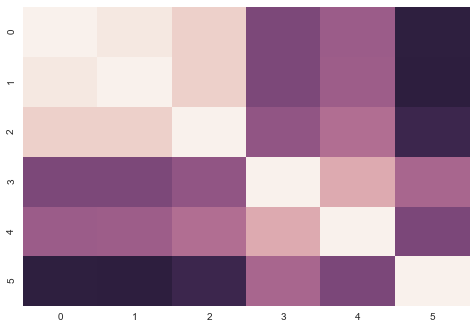

In [119]:
sns.heatmap(pd.DataFrame(dist_m.pairwise(house_mix[distance_attributes])),cbar=False)